# Netflix Business Case

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set color palette and style
sns.set_palette('pastel')
sns.set_style('whitegrid')

# Importing Data And Analyzing Basic Metrics

In [3]:
#Importing data
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# shape of data
df.shape

(8807, 12)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
# missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# data types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
for i in df.columns:
    print(i, ":", df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


# Data Preprocessing and Cleaning

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Unnesting of data in Columns: `director`, `cast`, `country`, `listed_in`

### `director`

In [11]:
# director = [d.strip() for i in df.loc[df['director'].isna()==False, 'director'].str.split(",") for d in i]
# director = np.array(director)
# director

In [12]:
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


### `cast`

In [13]:
constraint2 = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2 = pd.DataFrame(constraint2, index=df['title'])
df_new2 = df_new2.stack()
df_new2 = pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'}, inplace=True)
df_new2.drop(['level_1'], axis=1, inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


### `country`

In [14]:
constraint3 = df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new3 = pd.DataFrame(constraint3, index=df['title'])
df_new3 = df_new3.stack()
df_new3 = pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Country'}, inplace=True)
df_new3.drop(['level_1'], axis=1, inplace=True)
df_new3.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


### `listed_in`

In [15]:
constraint4 = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new4 = pd.DataFrame(constraint4, index=df['title'])
df_new4 = df_new4.stack()
df_new4 = pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'Genre'}, inplace=True)
df_new4.drop(['level_1'],axis=1, inplace=True)
df_new3.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


## Merging Data

In [16]:
# merging cast data with directors data
df_new5 = df_new1.merge(df_new2, on=['title'], how='inner')
# merging above df with country data
df_new6 = df_new5.merge(df_new3, on=['title'], how='inner')
# merging above df with genre data to get the final merged df
df_new = df_new6.merge(df_new4, on=['title'], how='inner')
df_new.head()

,title,Directors,Actors,Country,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows


In [17]:
# merging unnested data with original data
df_final = df_new.merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration']], on=['title'], how='left')

In [18]:
df_final.head()

,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


## Handling Missing Values

In [19]:
df_final.isna().sum()

title             0
Directors         0
Actors            0
Country           0
Genre             0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

### `Handling columns - Actors, Directors, Country`

In [20]:
df_final['Actors'].replace('nan', 'Unknown Actor', inplace=True)
df_final['Directors'].replace('nan', 'Unknown Director', inplace=True)
df_final['Country'].replace('nan', np.nan, inplace=True)

In [21]:
df_final.head()

,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [22]:
for i in df_final[df_final['Country'].isnull()]['Directors'].unique():
    if i in df_final[~df_final['Country'].isnull()]['Directors'].unique():
        val = df_final[df_final['Directors']==i]['Country'].mode().values[0]
        df_final.loc[df_final['Directors']==i, 'Country'] = df_final.loc[df_final['Directors']==i, 'Country'].fillna(val)

### `Handling Columns - Rating, Duration`

***In duration column, it was observed that the nulls had values which were written in corresponding ratings column, i.e- you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column***

In [23]:
df_final.loc[df_final['duration'].isna(), 'duration'] = df_final.loc[df_final['duration'].isna(), 'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False), 'rating'] = 'NR'
df_final.isna().sum()

title              0
Directors          0
Actors             0
Country         4276
Genre              0
show_id            0
type               0
date_added       158
release_year       0
rating            67
duration           0
dtype: int64

### `Handling column - date_added`

In [24]:
df_final[df_final['date_added'].isna()].head()

,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,British TV Shows,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,TV Comedies,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Unknown Director,Daniel Radcliffe,United Kingdom,TV Dramas,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,United Kingdom,British TV Shows,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Unknown Director,Jon Hamm,United Kingdom,TV Comedies,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [25]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    val = df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i, 'date_added'] = df_final.loc[df_final['release_year']==i, 'date_added'].fillna(val)

## Getting day, month and year

In [26]:
# def fdate(arr):
#     try:
#         day = arr.split()[1].strip(",")
#         month = arr.split()[0]

#         year = arr.split()[-1]
#         return ("-").join((day, month, year))
#     except:
#         return np.nan
    
df_final['date_added'] = pd.to_datetime(df_final['date_added'])
df_final['day'] = df_final['date_added'].dt.day
df_final['month'] = df_final['date_added'].dt.month
df_final['year'] = df_final['date_added'].dt.year

In [27]:
df_final.head()

,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration,day,month,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,25,9,2021
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021


## Creating separate dataframes for Movies and TV Shows

In [28]:
df_movies = df_final[df_final['type']=='Movie'].copy().reset_index()
df_movies.head()

,index,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration,day,month,year
0,0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,25,9,2021
1,159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,NaN,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91 min,24,9,2021
2,160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,NaN,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91 min,24,9,2021
3,161,My Little Pony: A New Generation,Robert Cullen,James Marsden,NaN,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91 min,24,9,2021
4,162,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,NaN,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91 min,24,9,2021


In [29]:
df_shows = df_final[df_final['type']=='TV Show'].copy().reset_index()
df_shows.head()

,index,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration,day,month,year
0,1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
1,2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
2,3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
3,4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
4,5,Blood & Water,Unknown Director,Khosi Ngema,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021


# Univariate Analysis

## Analysis of each column in terms of value counts and unique attributes

### `By Genre`

In [30]:
df_final.groupby(['Genre']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
Genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


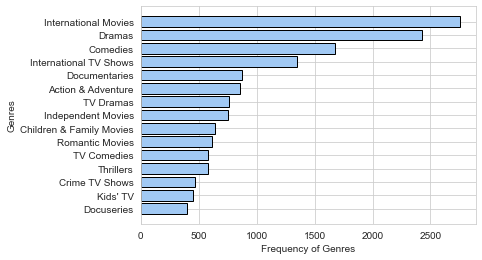

In [31]:
df_genre = df_final.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

### `By Type`

In [32]:
df_final.groupby(['type']).agg({'title':'nunique'})

,title
type,
Movie,6131
TV Show,2676


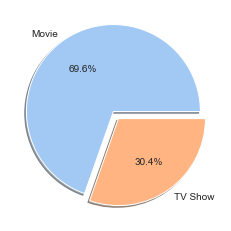

In [33]:
df_type = df_final.groupby(['type']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]
plt.pie(df_type['title'], labels=df_type['type'], autopct='%.1f%%', shadow=True, explode=(0.05,0.05))
plt.show()

### `By Country`

In [34]:
df_final.groupby(['Country']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
Country,
United States,4132
India,1116
United Kingdom,809
Canada,448
France,396
...,...
Jamaica,1
Slovakia,1
Ethiopia,1


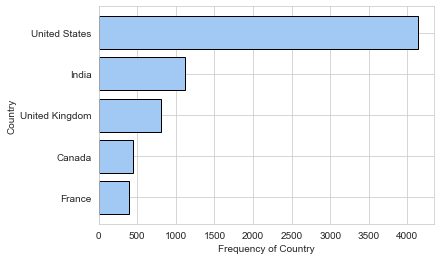

In [35]:
df_country = df_final.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending = False)[:5]
plt.barh(df_country[::-1]['Country'],df_country[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Country')
plt.ylabel('Country')
plt.show()

### `By Rating`

In [36]:
df_final.groupby(['rating']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


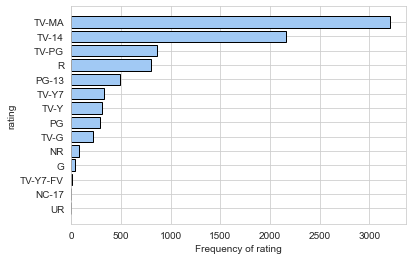

In [37]:
df_rating = df_final.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending = False)
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of rating')
plt.ylabel('rating')
plt.show()

### `By duration`

In [38]:
df_final.groupby(['duration']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
...,...
201 min,1
200 min,1
196 min,1


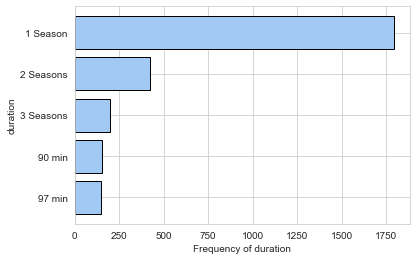

In [39]:
df_duration = df_final.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending = False)[:5]
plt.barh(df_duration[::-1]['duration'],df_duration[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of duration')
plt.ylabel('duration')
plt.show()

### `By Actors`

In [40]:
df_final.groupby(['Actors']).agg({'title':'nunique'}).sort_values(by='title', ascending=False)

,title
Actors,
Unknown Actor,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
...,...
Jamie Lee,1
Jamie Kenna,1
Jamie Kaler,1


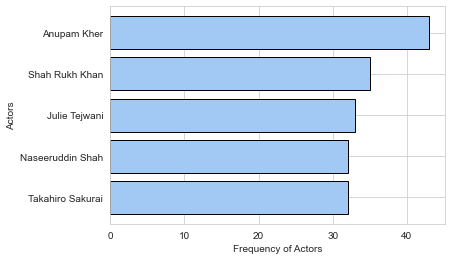

In [41]:
df_Actors = df_final.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending = False)[1:6]
plt.barh(df_Actors[::-1]['Actors'],df_Actors[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Actors')
plt.ylabel('Actors')
plt.show()

### `By Directors`

In [42]:
df_final.groupby(['Directors']).agg({'title':'nunique'}).sort_values(by='title', ascending=False)

,title
Directors,
Unknown Director,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
...,...
Brandon Camp,1
Juan Antin,1
Juan Antonio de la Riva,1


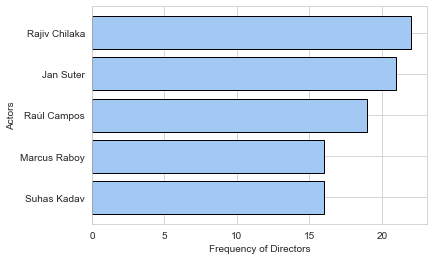

In [43]:
df_Directors = df_final.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending = False)[1:6]
plt.barh(df_Directors[::-1]['Directors'],df_Directors[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Directors')
plt.ylabel('Actors')
plt.show()

### `By Year`

In [44]:
df_final.groupby(['year']).agg({'title':'nunique'}).sort_values(by='title', ascending=False)

,title
year,
2019,2018
2020,1879
2018,1650
2021,1501
2017,1189
2016,432
2015,82
2014,24
2011,13


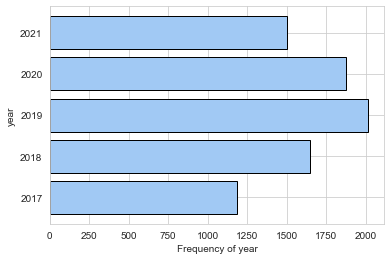

In [45]:
df_year = df_final.groupby(['year']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending = False)[:5]
plt.barh(df_year[::-1]['year'],df_year[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of year')
plt.ylabel('year')
plt.show()

### `By Month`

In [46]:
df_final.groupby(['month']).agg({'title':'nunique'}).sort_values(by='title', ascending=False)

,title
month,
7,832
12,813
9,772
4,765
10,760
8,756
3,742
1,738
6,728


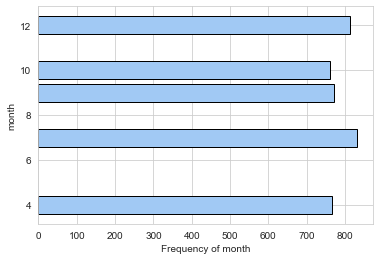

In [47]:
df_month = df_final.groupby(['month']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending = False)[0:5]
plt.barh(df_month[::-1]['month'],df_month[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of month')
plt.ylabel('month')
plt.show()

### `By Day of Month`

In [48]:
df_final.groupby(['day']).agg({'title':'nunique'}).sort_values(by='title', ascending=False)

,title
day,
1,2219
15,688
2,325
16,289
31,274
20,249
19,243
5,231
22,230


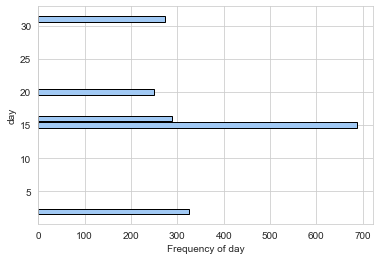

In [49]:
df_day = df_final.groupby(['day']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending = False)[1:6]
plt.barh(df_day[::-1]['day'],df_day[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of day')
plt.ylabel('day')
plt.show()

## Univariate Analysis of Movies

### By Genre

In [50]:
df_movies.groupby(['Genre']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
Genre,
International Movies,2752
Dramas,2427
Comedies,1674
Documentaries,869
Action & Adventure,859
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616
Thrillers,577


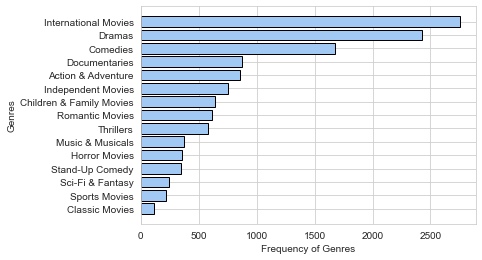

In [51]:
df_genre_movie = df_movies.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]
plt.barh(df_genre_movie[::-1]['Genre'],df_genre_movie[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

### By Country

In [52]:
df_movies.groupby(['Country']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
Country,
United States,2839
India,1031
United Kingdom,536
Canada,322
France,305
...,...
Slovakia,1
Kazakhstan,1
Somalia,1


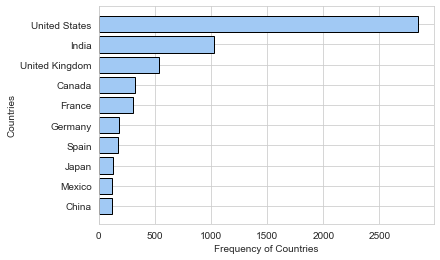

In [53]:
df_country_movie = df_movies.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.barh(df_country_movie[::-1]['Country'],df_country_movie[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Countries')
plt.ylabel('Countries')
plt.show()

### By Actors

In [54]:
df_movies.groupby(['Actors']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)[1:]

,title
Actors,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,32
Om Puri,30
Akshay Kumar,30
...,...
Jacob Blair,1
Jacob Bertrand,1
Jacob Batalon,1


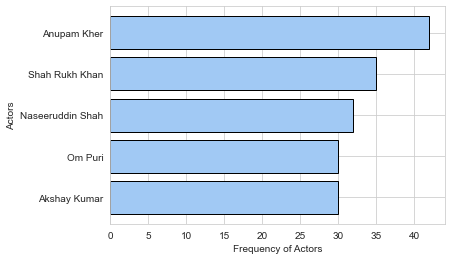

In [55]:
df_actors_movie = df_movies.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[1:6]
plt.barh(df_actors_movie[::-1]['Actors'], df_actors_movie[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Actors')
plt.ylabel('Actors')
plt.show()

### By Directors

In [56]:
df_movies.groupby(['Directors']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
Directors,
Unknown Director,188
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
...,...
José Ortuño,1
Bob Persichetti,1
Jovanka Vuckovic,1


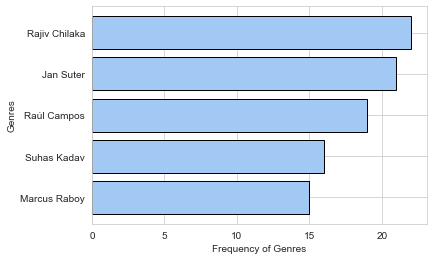

In [57]:
df_directors_movie = df_movies.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[1:6]
plt.barh(df_directors_movie[::-1]['Directors'],df_directors_movie[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

### By Rating

In [58]:
df_movies.groupby(['rating']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126


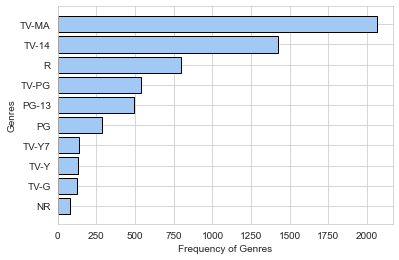

In [59]:
df_rating_movie = df_movies.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.barh(df_rating_movie[::-1]['rating'],df_rating_movie[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

## Univaraiate Analysis of Shows

### By Genre

In [60]:
df_shows.groupby(['Genre']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
Genre,
International TV Shows,1351
TV Dramas,763
TV Comedies,581
Crime TV Shows,470
Kids' TV,451
Docuseries,395
Romantic TV Shows,370
Reality TV,255
British TV Shows,253


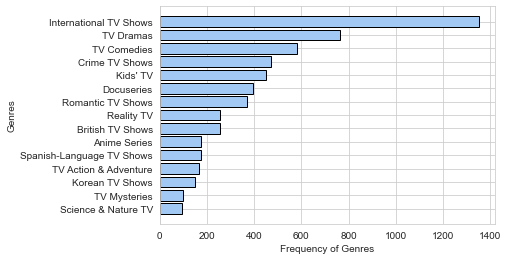

In [61]:
df_genre_shows = df_shows.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[:15]
plt.barh(df_genre_shows[::-1]['Genre'],df_genre_shows[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

### By Country

In [62]:
df_shows.groupby(['Country']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
Country,
United States,1293
United Kingdom,273
Japan,199
South Korea,170
Canada,126
...,...
Switzerland,1
Hungary,1
Malta,1


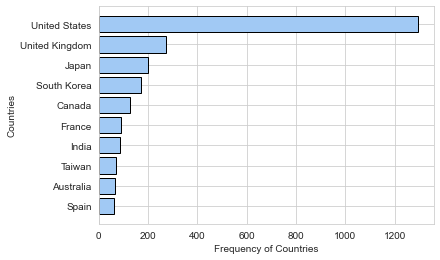

In [63]:
df_country_shows = df_shows.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.barh(df_country_shows[::-1]['Country'],df_country_shows[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Countries')
plt.ylabel('Countries')
plt.show()

### By Actors

In [64]:
df_shows.groupby(['Actors']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)[1:]

,title
Actors,
Takahiro Sakurai,25
Yuki Kaji,19
Junichi Suwabe,17
Daisuke Ono,17
Ai Kayano,17
...,...
Ivy Yin,1
Iván Pellicer,1
Iván Álvarez de Araya,1


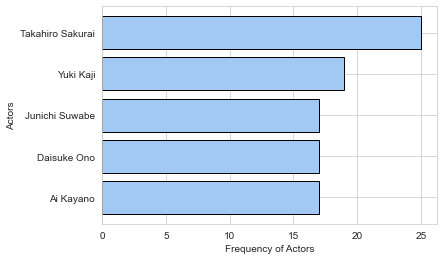

In [65]:
df_actors_shows = df_shows.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[1:6]
plt.barh(df_actors_shows[::-1]['Actors'], df_actors_shows[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Actors')
plt.ylabel('Actors')
plt.show()

### By Directors

In [66]:
df_shows.groupby(['Directors']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
Directors,
Unknown Director,2446
Ken Burns,3
Alastair Fothergill,3
Stan Lathan,2
Joe Berlinger,2
...,...
Houda Benyamina,1
Hong Won-ki,1
Hiroyuki Seshita,1


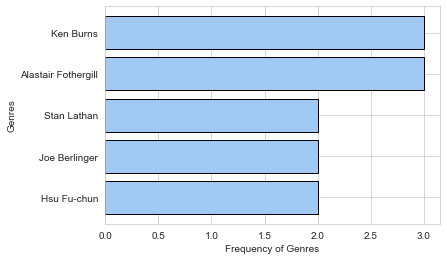

In [67]:
df_directors_shows = df_shows.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[1:6]
plt.barh(df_directors_shows[::-1]['Directors'],df_directors_shows[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

### By Rating

In [68]:
df_shows.groupby(['rating']).agg({'title':'nunique'}).sort_values(by='title', ascending = False)

,title
rating,
TV-MA,1145
TV-14,733
TV-PG,323
TV-Y7,195
TV-Y,176
TV-G,94
NR,5
R,2
TV-Y7-FV,1


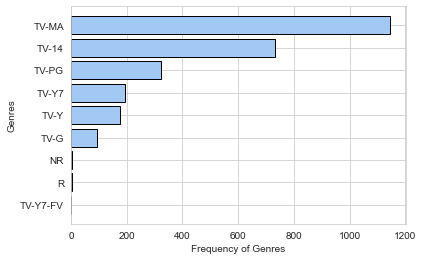

In [69]:
df_rating_shows = df_shows.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.barh(df_rating_shows[::-1]['rating'],df_rating_shows[::-1]['title'], edgecolor='black')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

# Multivariate Analysis

In [70]:
df_final.head()

,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration,day,month,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,25,9,2021
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021


In [71]:
df_movies.head()

,index,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration,day,month,year
0,0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min,25,9,2021
1,159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,NaN,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91 min,24,9,2021
2,160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,NaN,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91 min,24,9,2021
3,161,My Little Pony: A New Generation,Robert Cullen,James Marsden,NaN,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91 min,24,9,2021
4,162,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,NaN,Children & Family Movies,s7,Movie,2021-09-24,2021,PG,91 min,24,9,2021


In [72]:
df_shows.head()

,index,title,Directors,Actors,Country,Genre,show_id,type,date_added,release_year,rating,duration,day,month,year
0,1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
1,2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
2,3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
3,4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021
4,5,Blood & Water,Unknown Director,Khosi Ngema,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,24,9,2021


## Movies

### Top 5 countries and top 5 genres

In [73]:
movie_top5genre = df_movies['Genre'].value_counts().index[:5]
movie_top5country = df_movies['Country'].value_counts().index[:5]

In [74]:
movie_top5_genre_country = df_movies.loc[(df_movies['Genre'].isin(movie_top5genre)) & (df_movies['Country'].isin(movie_top5country))]

In [75]:
movie_top5_genre_country = movie_top5_genre_country.groupby(['Genre', 'Country'], as_index=False).agg({'title':'nunique'})

In [76]:
movie_top5_genre_country

,Genre,Country,title
0,Action & Adventure,Canada,44
1,Action & Adventure,France,37
2,Action & Adventure,India,147
3,Action & Adventure,United Kingdom,84
4,Action & Adventure,United States,404
5,Comedies,Canada,95
6,Comedies,France,51
7,Comedies,India,336
8,Comedies,United Kingdom,91
9,Comedies,United States,692


#### Count of Movies across top5 Genres and countries

In [77]:
movie_top5_genre_country_count = movie_top5_genre_country.pivot(index='Genre', columns='Country', values='title')

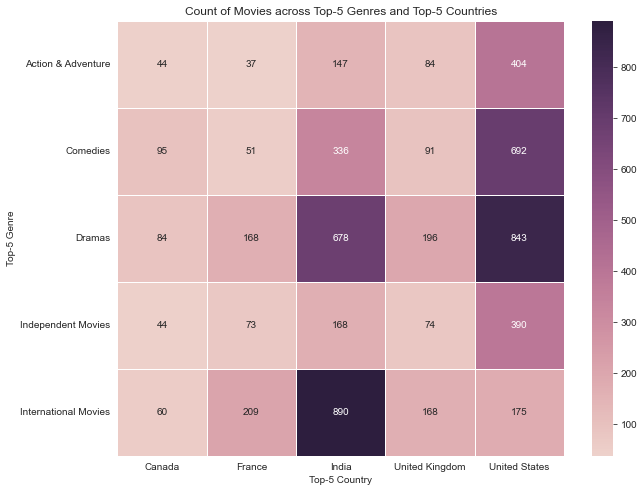

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(movie_top5_genre_country_count, 
            annot=True,fmt=".0f", cmap=sns.cubehelix_palette(as_cmap=True), linewidth=0.5)
plt.xlabel("Top-5 Country")
plt.ylabel("Top-5 Genre")
plt.title("Count of Movies across Top-5 Genres and Top-5 Countries")
plt.show()

### Top 5 ratings and top 5 genres

In [79]:
df_movies['Genre'].value_counts()

Dramas                      29775
International Movies        28211
Comedies                    20829
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
Thrillers                    7107
Romantic Movies              6412
Horror Movies                4571
Sci-Fi & Fantasy             4037
Music & Musicals             3077
Documentaries                2407
Sports Movies                1531
Classic Movies               1434
Cult Movies                  1077
Anime Features               1045
LGBTQ Movies                  838
Faith & Spirituality          719
Stand-Up Comedy               540
Movies                        412
Name: Genre, dtype: int64

In [80]:
movie_top5genre = df_movies['Genre'].value_counts().index[:5]
movie_top5rating = df_movies['rating'].value_counts().index[:5]

In [81]:
movie_top5_genre_rating = df_movies.loc[(df_movies['Genre'].isin(movie_top5genre)) & (df_movies['rating'].isin(movie_top5rating))]

In [82]:
movie_top5_genre_rating['duration'] = movie_top5_genre_rating['duration'].str.slice(stop=-4)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_9260\3114685209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_top5_genre_rating['duration'] = movie_top5_genre_rating['duration'].str.slice(stop=-4)


In [83]:
movie_top5_genre_rating['duration'] = pd.to_numeric(movie_top5_genre_rating['duration'])

C:\Users\Ayush\AppData\Local\Temp\ipykernel_9260\2036866998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_top5_genre_rating['duration'] = pd.to_numeric(movie_top5_genre_rating['duration'])


In [84]:
movie_top5_genre_rating['duration'].dtype

dtype('int64')

In [85]:
movie_top5_genre_rating_title_count = movie_top5_genre_rating.groupby(['Genre', 'rating'], as_index=False).agg({'title':'nunique'})

In [86]:
movie_top5_genre_rating_title_count

,Genre,rating,title
0,Action & Adventure,PG,32
1,Action & Adventure,PG-13,148
2,Action & Adventure,R,220
3,Action & Adventure,TV-14,213
4,Action & Adventure,TV-MA,201
5,Comedies,PG,148
6,Comedies,PG-13,168
7,Comedies,R,180
8,Comedies,TV-14,465
9,Comedies,TV-MA,431


#### Count of Movies across top5 Genres and ratings

In [87]:
movie_top5_genre_rating_title_count = movie_top5_genre_rating_title_count.pivot(index='rating', columns='Genre', values='title')

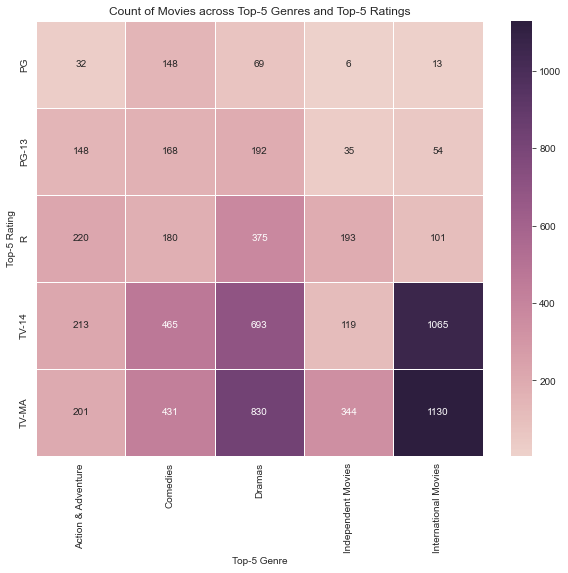

In [88]:
plt.figure(figsize=(10,8))
sns.heatmap(movie_top5_genre_rating_title_count, 
            annot=True,fmt=".0f", cmap=sns.cubehelix_palette(as_cmap=True), linewidth=0.5)
plt.xlabel("Top-5 Genre")
plt.ylabel("Top-5 Rating")
plt.title("Count of Movies across Top-5 Genres and Top-5 Ratings")
plt.show()

In [89]:
movie_top5_genre_rating_duration_mean = movie_top5_genre_rating.pivot_table(index='rating', columns='Genre', values='duration', aggfunc='mean')

In [90]:
movie_top5_genre_rating_duration_mean

Genre,Action & Adventure,Comedies,Dramas,Independent Movies,International Movies
rating,,,,,
PG,107.085317,96.159806,104.827106,101.524138,111.946188
PG-13,115.102663,103.134328,115.112874,98.561265,108.183164
R,108.431136,100.415229,116.064092,105.701829,110.067912
TV-14,124.916667,114.937061,121.275155,103.939068,118.801192
TV-MA,109.020833,100.385218,107.834972,101.185882,107.711028


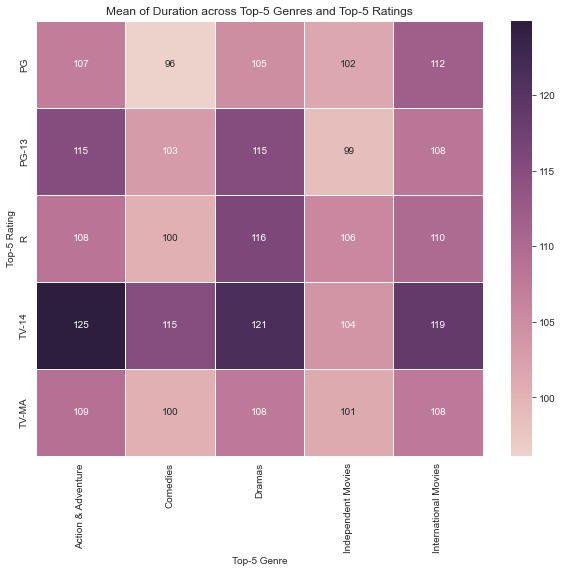

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(movie_top5_genre_rating_duration_mean, 
            annot=True,fmt=".0f", cmap=sns.cubehelix_palette(as_cmap=True), linewidth=0.5)
plt.xlabel("Top-5 Genre")
plt.ylabel("Top-5 Rating")
plt.title("Mean of Duration across Top-5 Genres and Top-5 Ratings")
plt.show()

## TV-Shows

### Top 5 Countries and top 5 Genres

In [92]:
shows_top5genre = df_shows['Genre'].value_counts().index[:5]
shows_top5country = df_shows['Country'].value_counts().index[:5]

In [93]:
shows_top5_genre_country = df_shows.loc[(df_shows['Genre'].isin(shows_top5genre)) & (df_shows['Country'].isin(shows_top5country))]

In [94]:
shows_top5_genre_country = shows_top5_genre_country.groupby(['Genre', 'Country'], as_index=False).agg({'title':'nunique'})

In [95]:
shows_top5_genre_country

,Genre,Country,title
0,Crime TV Shows,Canada,15
1,Crime TV Shows,Japan,16
2,Crime TV Shows,South Korea,24
3,Crime TV Shows,United Kingdom,49
4,Crime TV Shows,United States,186
5,International TV Shows,Canada,25
6,International TV Shows,Japan,151
7,International TV Shows,South Korea,152
8,International TV Shows,United Kingdom,128
9,International TV Shows,United States,274


#### Count of Shows across top5 Genres and countries

In [96]:
shows_top5_genre_country_count = shows_top5_genre_country.pivot(index='Genre', columns='Country', values='title')

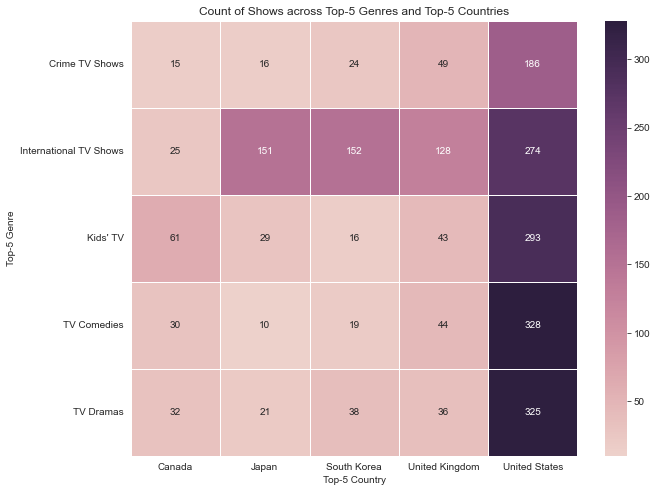

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(shows_top5_genre_country_count, 
            annot=True,fmt=".0f", cmap=sns.cubehelix_palette(as_cmap=True), linewidth=0.5)
plt.xlabel("Top-5 Country")
plt.ylabel("Top-5 Genre")
plt.title("Count of Shows across Top-5 Genres and Top-5 Countries")
plt.show()

### Top 5 ratings and top 5 genres

In [98]:
df_shows['Genre'].value_counts()

International TV Shows          12845
TV Dramas                        8942
TV Comedies                      4963
Crime TV Shows                   4733
Kids' TV                         4568
Romantic TV Shows                3049
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
TV Mysteries                     1281
Korean TV Shows                  1122
TV Sci-Fi & Fantasy              1045
TV Horror                         941
Docuseries                        845
TV Thrillers                      768
Teen TV Shows                     742
Reality TV                        735
TV Shows                          337
Classic & Cult TV                 272
Stand-Up Comedy & Talk Shows      268
Science & Nature TV               157
Name: Genre, dtype: int64

In [99]:
shows_top5genre = df_shows['Genre'].value_counts().index[:5]
shows_top5rating = df_shows['rating'].value_counts().index[:5]

In [100]:
shows_top5_genre_rating = df_shows.loc[(df_shows['Genre'].isin(shows_top5genre)) & (df_shows['rating'].isin(shows_top5rating))]

In [101]:
shows_top5_genre_rating['duration'] = shows_top5_genre_rating['duration'].str.extract('(\d+)')

C:\Users\Ayush\AppData\Local\Temp\ipykernel_9260\3998623474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows_top5_genre_rating['duration'] = shows_top5_genre_rating['duration'].str.extract('(\d+)')


In [102]:
shows_top5_genre_rating['duration'] = pd.to_numeric(shows_top5_genre_rating['duration'])

C:\Users\Ayush\AppData\Local\Temp\ipykernel_9260\1936415642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows_top5_genre_rating['duration'] = pd.to_numeric(shows_top5_genre_rating['duration'])


In [103]:
shows_top5_genre_rating['duration'].dtype

dtype('int64')

In [104]:
shows_top5_genre_rating_title_count = shows_top5_genre_rating.groupby(['Genre', 'rating'], as_index=False).agg({'title':'nunique'})

In [105]:
shows_top5_genre_rating_title_count

,Genre,rating,title
0,Crime TV Shows,TV-14,111
1,Crime TV Shows,TV-MA,350
2,Crime TV Shows,TV-PG,4
3,Crime TV Shows,TV-Y7,3
4,International TV Shows,TV-14,472
5,International TV Shows,TV-MA,714
6,International TV Shows,TV-PG,134
7,International TV Shows,TV-Y7,3
8,Kids' TV,TV-PG,41
9,Kids' TV,TV-Y,176


#### Count of Movies across top5 Genres and ratings

In [106]:
shows_top5_genre_rating_title_count = shows_top5_genre_rating_title_count.pivot(index='rating', columns='Genre', values='title')

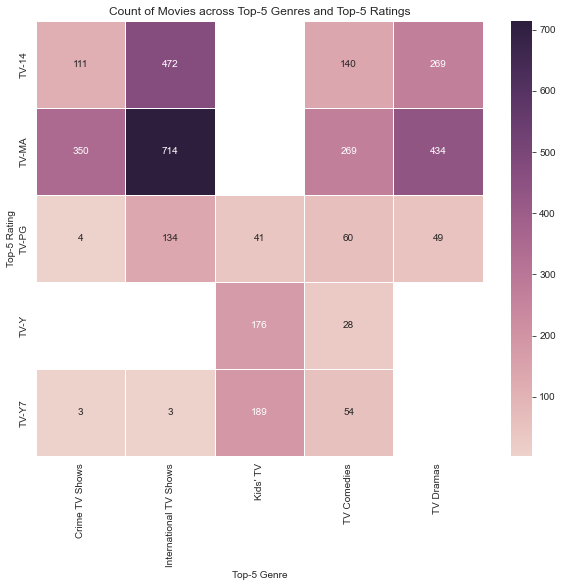

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(shows_top5_genre_rating_title_count, 
            annot=True,fmt=".0f", cmap=sns.cubehelix_palette(as_cmap=True), linewidth=0.5)
plt.xlabel("Top-5 Genre")
plt.ylabel("Top-5 Rating")
plt.title("Count of Movies across Top-5 Genres and Top-5 Ratings")
plt.show()

In [108]:
shows_top5_genre_rating_duration_mean = shows_top5_genre_rating.pivot_table(index='rating', columns='Genre', values='duration', aggfunc='mean')

In [109]:
shows_top5_genre_rating_duration_mean

Genre,Crime TV Shows,International TV Shows,Kids' TV,TV Comedies,TV Dramas
rating,,,,,
TV-14,2.374233,1.425991,NaN,2.188609,2.232980
TV-MA,1.824986,1.582194,NaN,2.237745,1.911950
TV-PG,1.000000,1.248439,2.315992,3.114345,1.944444
TV-Y,NaN,NaN,1.929128,1.682927,NaN
TV-Y7,2.476190,1.885714,2.198221,2.191057,NaN


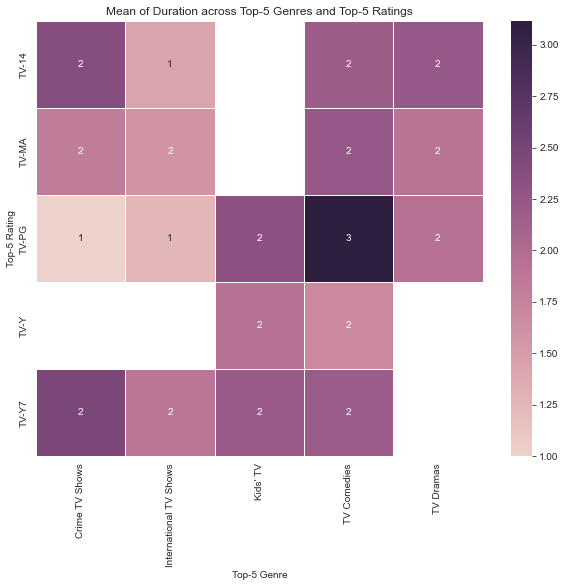

In [110]:
plt.figure(figsize=(10,8))
sns.heatmap(shows_top5_genre_rating_duration_mean, 
            annot=True,fmt=".0f", cmap=sns.cubehelix_palette(as_cmap=True), linewidth=0.5)
plt.xlabel("Top-5 Genre")
plt.ylabel("Top-5 Rating")
plt.title("Mean of Duration across Top-5 Genres and Top-5 Ratings")
plt.show()

# Insights and Recommendations

## Insights

* The content on Netflix is divided into two broad categories which are Movies and TV-Shows
* The top 5 content genres for 
    * Overall - 
        * International Movies
        * Dramas
        * Comedies
        * International TV-Shows
        * Documentaries
    * Movies - 
        * International Movies
        * Dramas
        * Comedies
        * Documentaries
        * Action and Adventure
    * TV-Shows - 
        * International TV-Shows
        * TV-Dramas
        * TV-Comedies
        * Crime TV-Shows
        * Kids TV
* Top content producing countries
    * Overall
        1. United States
        2. Inda
        3. United Kingdom
        4. Canada
        5. France
    * Movies
        1. United States
        2. Inda
        3. United Kingdom
        4. Canada
        5. France
    * TV-Shows
        1. United States
        2. United Kingdom
        3. Japan
        4. South Korea
        5. Canada
* Top Movie Genres across countries which produce most content
    * International Movies
    * Independent Movies
    * Action and Adventure
    * Drama
    * Comedies
* Top Movie Genres across countries which produce most content
    * International TV-Shows
    * Crime TV
    * Kids TV
    * TV-Drama
    * TV-Comedies
    

## Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are 
Drama, Comedy and International TV Shows/Movies, so content aligning to that 
is recommended.

2) Add TV Shows in July/August and Movies in last week of the year/first month of 
the next year.

3) For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows
are also popular along with the genres in first point, hence recommended.

4) For UK audience, recommended length for movies is same as that of USA (80-120 mins)

5) The target audience in USA and India is recommended to be 14+ and above ratings while
for UK, its recommended to be completely Mature/R content .

6) Add movies for Indian Audience, it has been declining since 2018.

7) Anime Genre for Japan and Romantic Genre in TV Shows for
 South Korean audiences is recommended.

8) While creating content, take into consideration the popular actors/directors
for that country. Also take into account the director-actor combination which 
is highly recommended. 